# Visualisation

## Run the cell below each time you start up...

In [1]:
# Don't display warnings

import warnings
warnings.filterwarnings('ignore')

# Import common files
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Matplotlib


## Simple Simulation

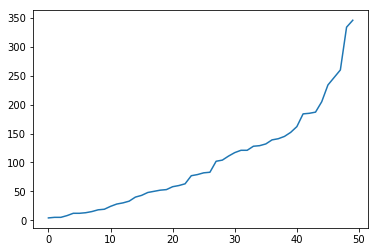

In [2]:
"""
In the following simulation, we start with a room with 50 people
(numbered from 1-50) and each person has $100.  
Each time the clock ticks, the person picks a number between 1 and 50
and gives $1 to the person with that number.

After many clock ticks, how much money does each person in the room have?

(or more accurately, how is the money distributed)
"""

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
def tick(people):
    tickets = np.random.randint(0, people.size, people.size)
    givers = people != 0
    people[givers] -= 1
    np.add.at(people, tickets[np.where(givers)], 1)
    return people
 

# Start off with 50 people and give them each $100
number_people = 50
people = np.ones(number_people, dtype='int') * 100
    
for i in range(50000):
    people = tick(people)

# Plotting code starts here...
plt.plot(sorted(people))

plt.savefig('simulation.svg') 

In [9]:
# And open it
!open simulation.html 

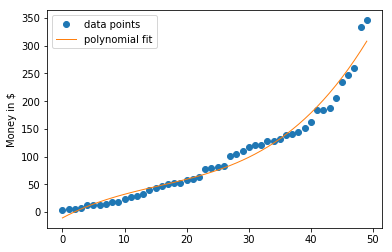

In [3]:
x = list(range(0,number_people))
y = sorted(people)
poly_deg = 3
coefs = np.polyfit(x, y, poly_deg)
y_poly = np.polyval(coefs, x)

plt.plot(x, y, "o", label="data points")
plt.plot(x, y_poly, label="polynomial fit", linewidth=1)
plt.ylabel('Money in $')
plt.legend()

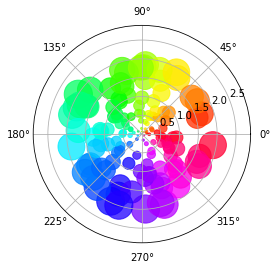

In [4]:
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

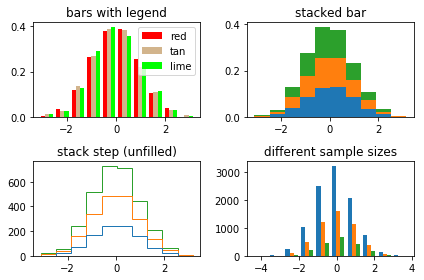

In [5]:
"""
=============================================================
Demo of the histogram (hist) function with multiple data sets
=============================================================

Plot histogram with multiple sample sets and demonstrate:

    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with no fill
    * Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
# plt.show()
plt.plot()
plt.savefig("histogram.pdf")

In [ ]:
!open histogram.pdf

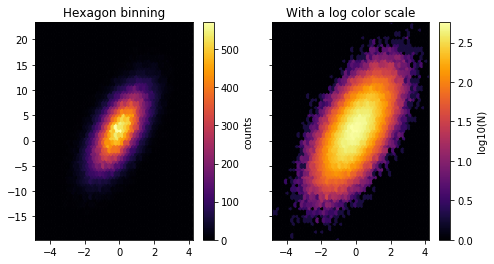

In [6]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

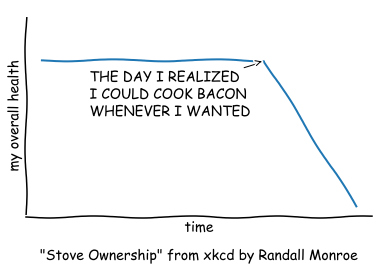

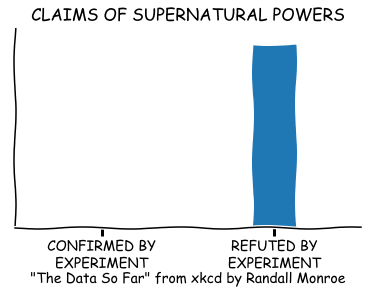

In [7]:
"""
====
XKCD
====

Shows how to create an xkcd-like plot.
"""
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.01,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()


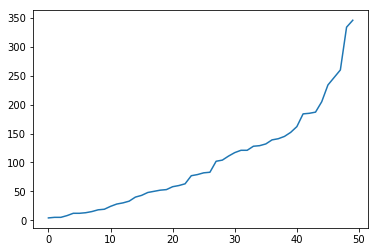

In [7]:
# Replot simulation using xkcd

import matplotlib.pyplot as plt
import numpy as np

plt.plot(sorted(people))

# Melbourne Water dam levels

### (You need to restart the kernel to reset the xkcd style - this is currently a know issue)

In [8]:
# Set up environment...

import warnings
warnings.filterwarnings('ignore')

Text(0,0.5,'Percent Full')

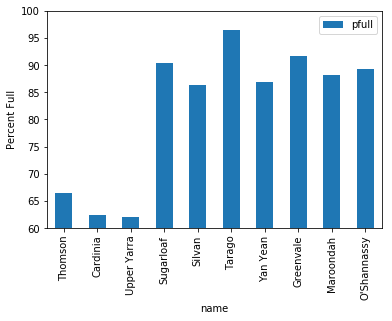

In [10]:
import pandas as pd

%matplotlib inline 

# plt.style.use('fivethirtyeight')

df = pd.read_csv('daily_storage.csv', 
                 names=['name', 'tvol', 'cvol', 'change', 'pfull', 'rain'], 
                 header=0, engine='python', skipfooter=1)
ax = df.plot('name', 'pfull', kind='bar', ylim=(60,100))
ax.set_ylabel("Percent Full")

Text(0,0.5,'Percent Full')

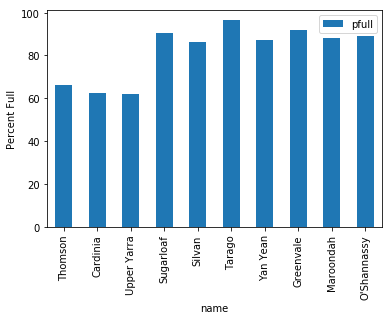

In [11]:
ax = df.plot('name', 'pfull', kind='bar')
ax.set_ylabel("Percent Full")

Text(0,0.5,'Volume (ML)')

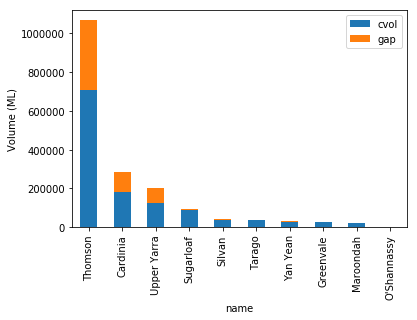

In [12]:
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set(style="whitegrid", palette="muted")

df['gap'] = df['tvol'] - df['cvol']
ax = df.plot('name', ['cvol', 'gap'], kind='bar', stacked=True)
ax.set_ylabel("Volume (ML)")

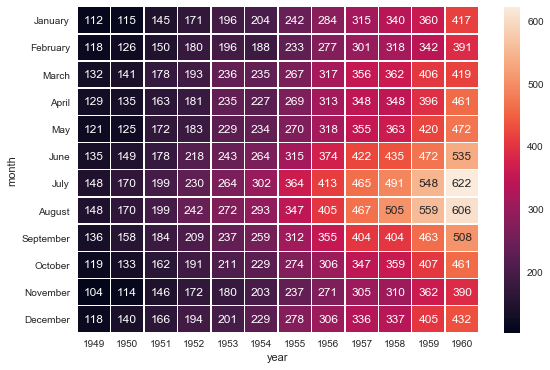

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [14]:
tips = sns.load_dataset("tips")
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


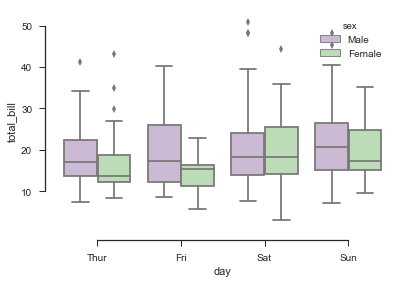

In [18]:
import seaborn as sns

sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

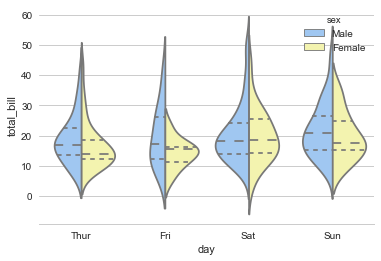

In [19]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

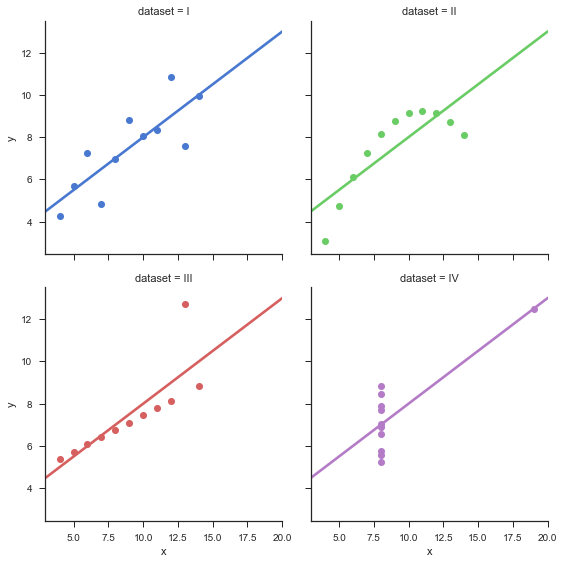

In [15]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

# ACORN-SAT
## Australian Temperature Reference Network¶

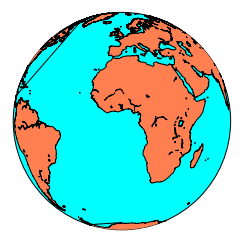

In [16]:
# Show a simple map

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0, resolution='l')

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

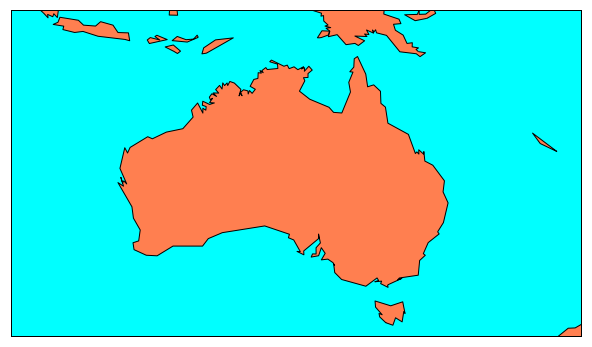

In [3]:
# Show a simple map of Australia

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5)
# map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

In [18]:
import pandas as pd

df = pd.read_csv('stations.csv')
df[:5]

,stn_num,stn_name,lat,lon,altitude,date_opened
0,1019,Kalumburu,-14.30,126.65,23,1941
1,2012,Halls Creek,-18.23,127.66,422,1910
2,3003,Broome Airport,-17.95,122.24,7,1910
3,4032,Port Hedland,-20.37,118.63,6,1912
4,4106,Marble Bar,-21.18,119.75,182,1910


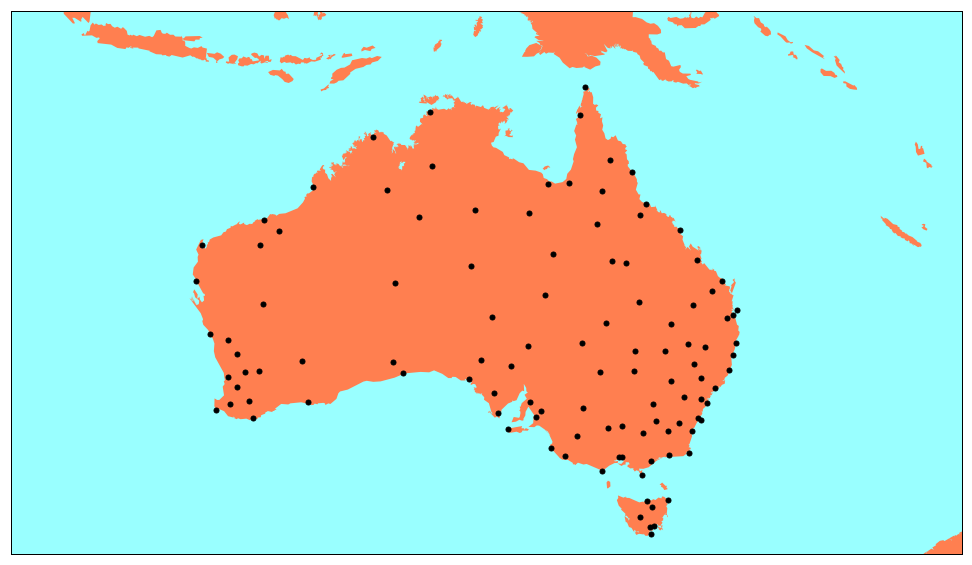

In [5]:
# Show a map of Australia with ACORN-SAT stations

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,10))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='coral',lake_color='#99ffff')
map.scatter(df['lon'], df['lat'], 25, marker='o',color='k', zorder=50)

plt.show()

In [19]:
import numpy as np
import scipy.spatial 
from graphviz import Digraph

latlon = list(zip(df['lat'], df['lon']))

tree = scipy.spatial.cKDTree(latlon)
dd, ii = tree.query(latlon, k=4)
dot = Digraph()

for x in df["stn_num"]:
   dot.node(str(x))
    
for line in ii:
   for x in line[1:]:
        dot.edges([(str(df["stn_num"][line[0]]), str(df["stn_num"][x]))])

dot.render(view=True)

'Digraph.gv.pdf'

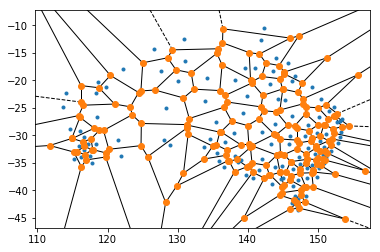

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

lonlat = list(zip(df['lon'], df['lat']))
vor = Voronoi(lonlat)
voronoi_plot_2d(vor)

plt.show()

# See: http://schweitzer.id.au/acorn_sat/voronoi2.html

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title
    
    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

# grid = gridplot([[I, II], [III, IV]], toolbar_location=None)
grid = gridplot([[I, II], [III, IV]], toolbar_location='below')

doc = Document()
doc.add_root(grid)


doc.validate()
filename = "anscombe.html"
with open(filename, "w") as f:
    f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
print("Wrote %s" % filename)
view(filename)

In [20]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

%matplotlib inline

output_notebook()

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

show(p)

Loading BokehJS ...

In [21]:
# Joyplots

from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

%matplotlib inline

output_file("joyplot.html")

def joy(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = joy(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

# Plotly

In [22]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("school_earnings.csv")

table = ff.create_table(df)
py.iplot(table)

In [23]:
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)


trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

# Maps

## Google Maps (and Highcharts)

* [ACORN-SAT](http://schweitzer.id.au/acorn_sat/acorn3.html)

## Leaflet

* [Regional Water Information](http://www.bom.gov.au/water/rwi/#sf_tt/001/2017)
                             

# Cesium

[USGS Earthquake Data](https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

# Vega

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
df.plot.scatter(x='x', y='y')

In [ ]:
import numpy as np
import pandas as pd
import pdvega  # import adds vgplot attribute to pandas

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})

df.vgplot.scatter(x='x', y='y')

# Conclusions

## Matplotlib

* The workhorse for Python
* Not much it can't do
* Useful for static plots
* Integrates well with Python's maths and science toolkits

## Seaborn

* Adds some style and flair to Matplotlib

## Bokeh

* Targets web pages
* Has a number of tools for interaction
* Easier learning curve than Matplotlib
* Looks good out of the box
* Integrates well with other libraries

## Plotly

* Based on commercial package
* Leverages D3 for graphics
* More extensive interaction than Bokeh

## PDVega

* Extends Pandas (already a very good package)
* Allows data to be exported with image
* Quite polished
* Works well with Jupyter Notebook

## Basemap

* Based on Matplotlib
* A little clunky

## Cartopy 

* Promise of a better basemap


## Google Maps

* Not really open source
* Easy things easy

## Leaflet

* Lightweight
* Quick to learn and use
* Supports many formats (e.g. WMS and GeoJSON)
* Supports plug-ins

## OpenLayers

* More features
* Supports more layer types
* Improved ease of use

## Cesium

* 3D
* Many features out of the box




# Recommendation

If working with Python, learn Pandas and use Pandas plotting for static plots or Vega for web.
